# Question 3

### Part 1: Use the diamond dataset to perform exploratory data analysis and construct a KNN based estimator for predicting the diamond price. Propose a appropriate value for K.    

### Load and Analyse data  

In [1]:
# import the common libraries 

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

%matplotlib inline 

In [2]:
# load and analyse the data 

diamond =pd.read_csv('diamonds.csv', index_col = 0)

In [3]:
diamond.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
diamond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


In [5]:
diamond.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [6]:
diamond.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


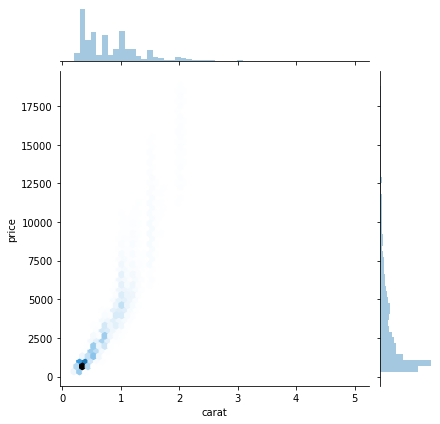

In [7]:
sns.jointplot(x='carat', y='price', data = diamond, kind='hex')

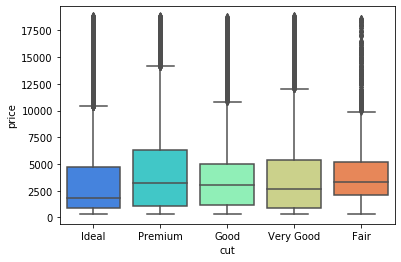

In [8]:
sns.boxplot(x='cut',y='price',data= diamond,palette= 'rainbow')

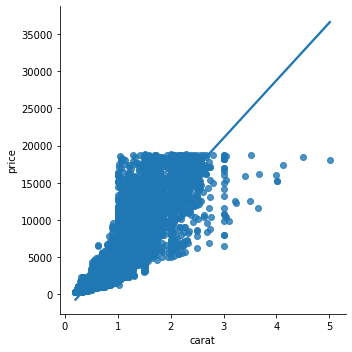

In [10]:
sns.lmplot(x='carat',y='price',data = diamond)

#### Create dummany variables 

In [11]:
print("Types of cut: ", diamond['cut'].unique().tolist())
print("Types of color: ", diamond['color'].unique().tolist())
print("Types of clarity: ", diamond['clarity'].unique().tolist())

Types of cut:  ['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Types of color:  ['E', 'I', 'J', 'H', 'F', 'G', 'D']
Types of clarity:  ['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']


##### Note:

The columns for cut, color and diamond are categorical. That means that we need to transform them using dummy variables so sklearn will be able to understand them.

In [12]:
Diamond_data = pd.get_dummies(diamond,columns= ['cut', 'color', 'clarity'],drop_first= False)

In [13]:
Diamond_data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


In [14]:
Diamond_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   price          53940 non-null  int64  
 4   x              53940 non-null  float64
 5   y              53940 non-null  float64
 6   z              53940 non-null  float64
 7   cut_Fair       53940 non-null  uint8  
 8   cut_Good       53940 non-null  uint8  
 9   cut_Ideal      53940 non-null  uint8  
 10  cut_Premium    53940 non-null  uint8  
 11  cut_Very Good  53940 non-null  uint8  
 12  color_D        53940 non-null  uint8  
 13  color_E        53940 non-null  uint8  
 14  color_F        53940 non-null  uint8  
 15  color_G        53940 non-null  uint8  
 16  color_H        53940 non-null  uint8  
 17  color_I        53940 non-null  uint8  
 18  color_

#### Standardize the variables

As the KNN classifer predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Variables of a large scale will have a much larger effect on the distance between the observations, KNN claddifer, than variables that are on a small scale.

In [15]:
# import standard scaler 

from sklearn.preprocessing import StandardScaler

In [16]:
X_metric = Diamond_data[['carat', 'depth', 'table', 'x', 'y', 'z']]
X_metric.head()

,carat,depth,table,x,y,z
1,0.23,61.5,55.0,3.95,3.98,2.43
2,0.21,59.8,61.0,3.89,3.84,2.31
3,0.23,56.9,65.0,4.05,4.07,2.31
4,0.29,62.4,58.0,4.20,4.23,2.63
5,0.31,63.3,58.0,4.34,4.35,2.75


In [17]:
X_metric.tail()

,carat,depth,table,x,y,z
53936,0.72,60.8,57.0,5.75,5.76,3.50
53937,0.72,63.1,55.0,5.69,5.75,3.61
53938,0.70,62.8,60.0,5.66,5.68,3.56
53939,0.86,61.0,58.0,6.15,6.12,3.74
53940,0.75,62.2,55.0,5.83,5.87,3.64


In [18]:
X_dummies = Diamond_data.drop(['carat', 'depth', 'table', 'x', 'y', 'z', 'price'], axis = 1)
X_dummies.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0


In [19]:
X_dummies.tail()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
53936,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53937,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53938,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
53939,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
53940,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
Y = Diamond_data['price']
Y.head()

1    326
2    326
3    327
4    334
5    335
Name: price, dtype: int64

In [21]:
Y.tail()

53936    2757
53937    2757
53938    2757
53939    2757
53940    2757
Name: price, dtype: int64

In [22]:
col1 = X_metric.columns

In [23]:
col1

Index(['carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [24]:
range1 = pd.Series(range(1,53941,1))
range1.head()

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [25]:
range1.tail()

53935    53936
53936    53937
53937    53938
53938    53939
53939    53940
dtype: int64

In [26]:
scaler = StandardScaler()
X_metric_scaled = scaler.fit_transform(X_metric)
X_met = pd.DataFrame(X_metric_scaled, columns = col1, index = range1)
X_met.head()

,carat,depth,table,x,y,z
1,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129
2,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175
3,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175
4,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720
5,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674


In [27]:
X_met.tail()

,carat,depth,table,x,y,z
53936,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888
53937,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988
53938,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135
53939,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204
53940,-0.101137,0.314528,-1.099672,0.088115,0.118616,0.143499


In [28]:
scaler2 = StandardScaler()
Y_scaled = scaler2.fit_transform(Y.values.reshape(-1,1))
Y = pd.DataFrame(Y_scaled, columns = ['price'], index = range1)
Y.head()

,price
1,-0.904095
2,-0.904095
3,-0.903844
4,-0.902090
5,-0.901839


In [29]:
Y.tail()

,price
53936,-0.294731
53937,-0.294731
53938,-0.294731
53939,-0.294731
53940,-0.294731


In [30]:
X_new = [X_met, X_dummies] 

In [31]:
X = pd.concat(X_new, axis = 1)
X.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-1.198168,-0.174092,-1.099672,-1.587837,-1.536196,-1.571129,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-1.240361,-1.360738,1.585529,-1.641325,-1.658774,-1.741175,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-1.198168,-3.385019,3.375663,-1.498691,-1.457395,-1.741175,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-1.071587,0.454133,0.242928,-1.364971,-1.317305,-1.287720,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,-1.029394,1.082358,0.242928,-1.240167,-1.212238,-1.117674,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [32]:
X.tail()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
53936,-0.164427,-0.662711,-0.204605,0.016798,0.022304,-0.054888,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,-0.164427,0.942753,-1.099672,-0.036690,0.013548,0.100988,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,-0.206621,0.733344,1.137995,-0.063434,-0.047741,0.030135,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53939,0.130927,-0.523105,0.242928,0.373383,0.337506,0.285204,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
53940,-0.101137,0.314528,-1.099672,0.088115,0.118616,0.143499,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   carat          53940 non-null  float64
 1   depth          53940 non-null  float64
 2   table          53940 non-null  float64
 3   x              53940 non-null  float64
 4   y              53940 non-null  float64
 5   z              53940 non-null  float64
 6   cut_Fair       53940 non-null  uint8  
 7   cut_Good       53940 non-null  uint8  
 8   cut_Ideal      53940 non-null  uint8  
 9   cut_Premium    53940 non-null  uint8  
 10  cut_Very Good  53940 non-null  uint8  
 11  color_D        53940 non-null  uint8  
 12  color_E        53940 non-null  uint8  
 13  color_F        53940 non-null  uint8  
 14  color_G        53940 non-null  uint8  
 15  color_H        53940 non-null  uint8  
 16  color_I        53940 non-null  uint8  
 17  color_J        53940 non-null  uint8  
 18  clarit

#### Data Visualization and analysis  

Text(0.5, 1, 'X Numeric Correlation')

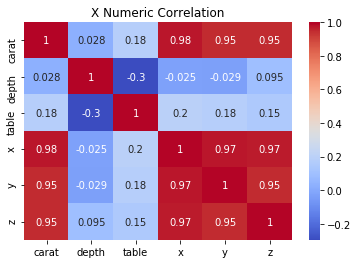

In [34]:
# some correlation analysis 

sns.heatmap(X[['carat', 'depth', 'table','x','y','z']].corr(),cmap='coolwarm', annot= True )
plt.title('X Numeric Correlation')

#### Train Test Split 

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

### Construct a KNN based estimator  

In [37]:
# import the K Neighbor regressor 

from sklearn.neighbors import KNeighborsRegressor

In [38]:
# finding the right K value  

score = []

for k in range(1,20):
  neigh = KNeighborsRegressor(n_neighbors=k, weights='distance') #uniform weights does averaging
  neigh.fit(X_train,y_train)
  score.append(neigh.score(X_test,y_test))

Text(0.5, 1.0, 'Finding Optimal K value')

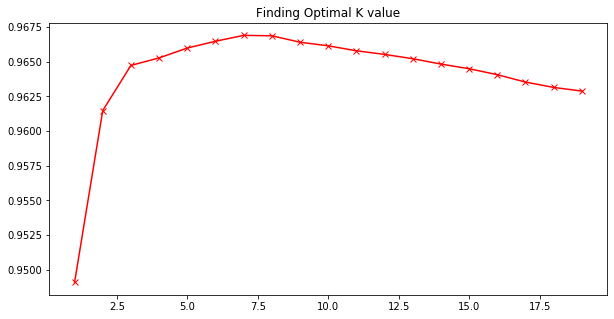

In [39]:
plt.figure(figsize=(10,5))
plt.plot(list(range(1,20)),score,'x-', color='red')
plt.title('Finding Optimal K value')

#### Note:

It can be seen from the grpah above that the appropriate K value would be 7.  

In [40]:
k = 7
neigh = KNeighborsRegressor(n_neighbors=k, weights='distance') #uniform weights does averaging
neigh.fit(X_train,y_train)
y_pred = neigh.predict(X_test)

### Check Model performance 

In [41]:
# import performance matrics 

from sklearn.metrics import mean_squared_error, r2_score

In [43]:
# Performance analysis

print("R2 Score")
print(r2_score(y_test, y_pred))

print("MSE")
print(mean_squared_error(y_test,y_pred))

R2 Score
0.9668891128782067
MSE
0.03307237213348351


#### Results:

The results of the model performance evaluation that is obtained from the R2 score and the MSE are good. 

R-squared is a a goodness-of-fit measure that has values ranging from 0 to 1. It shows the measures the strength of the relationship between the model and the dependent variable. In this case, we have a high R2 score of 0.967. This tells us that there is only a small difference between the observed data and the fitted values which is good.

Furthermore, there is also the Mean Squared Error (MSE). MSE tells us how close a regression line is to a set of actual data points. A smaller MSE of 0.033 from the model tells us that the data values are close to the best fit line which is good.

Thus, overall, we can conclude that the KNN estimator constructed is good. 

### Predict Price using the model 

In [44]:
# the diacmond from https://www.bluenile.com/sg/diamond-details/LD12128236?refTab=DIAMONDS&track=viewDiamondDetails
# has been chosen as the input

Populating the interactive namespace from numpy and matplotlib


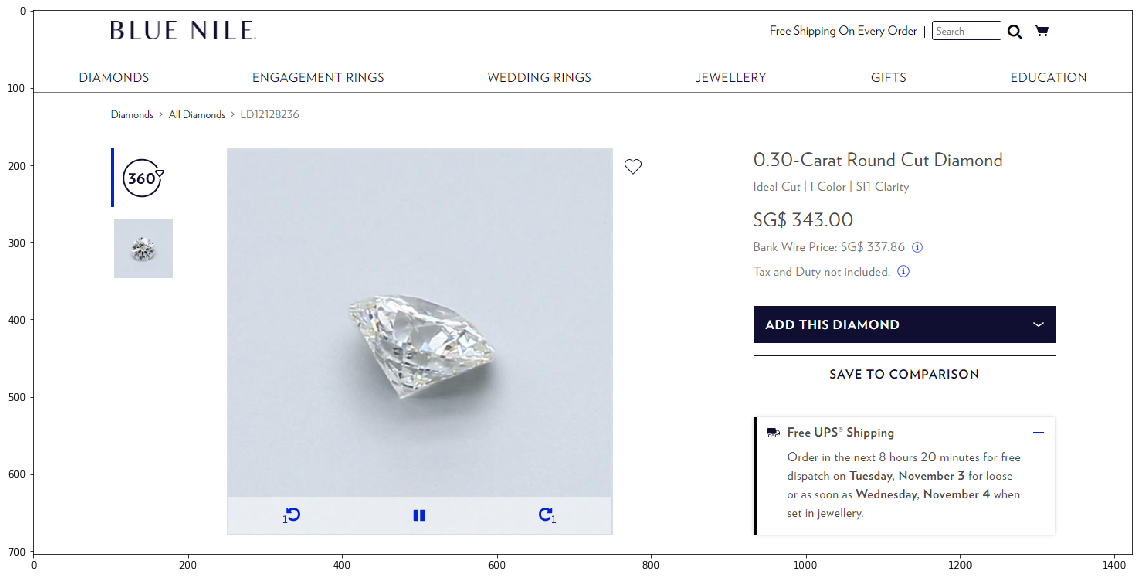

In [47]:
# display the image

%pylab inline

import matplotlib.image as mpimg
img1 = mpimg.imread('diamond.png')
plt.figure(figsize = (20, 10))
imgplot = plt.imshow(img1)

plt.show()

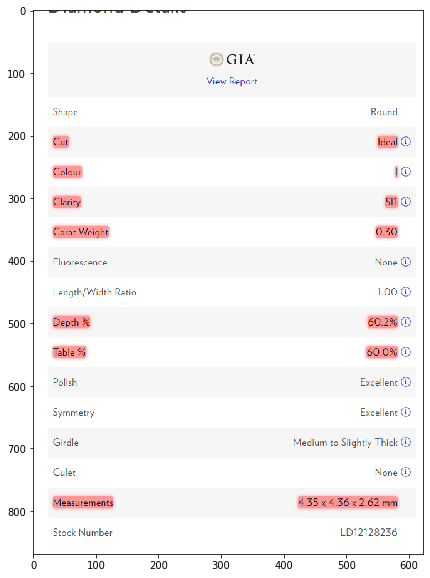

In [48]:
img2 = mpimg.imread('diamond1.png')
plt.figure(figsize = (20, 10))
imgplot = plt.imshow(img2)

plt.show()

In [50]:
make_pred_X_metric = [0.3, 60.2, 60.0, 4.35, 4.36, 2.62]
make_pred_X_metric

[0.3, 60.2, 60.0, 4.35, 4.36, 2.62]

In [57]:
pred_X_metric = pd.DataFrame([[0.3, 60.2, 60.0, 4.35, 4.36, 2.62]] , columns = ['carat', 'depth', 'table', 'x', 'y', 'z'], index = [1])
pred_X_metric.head()

,carat,depth,table,x,y,z
1,0.3,60.2,60.0,4.35,4.36,2.62


In [60]:
pred_X_metric_scaled = scaler.transform(pred_X_metric)
pred_X_met = pd.DataFrame(pred_X_metric_scaled, columns = col1, index = [1])
pred_X_met.head()

,carat,depth,table,x,y,z
1,-1.050491,-1.081527,1.137995,-1.231252,-1.203482,-1.30189


In [61]:
pred_X_category = [0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0]
pred_X_category

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [62]:
col3 = X_dummies.columns
col3

Index(['cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')

In [65]:
pred_X_cat = pd.DataFrame([[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]], columns = col3, index = [1])
pred_X_cat.head()

,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0


In [66]:
pred_X_new2 = [pred_X_met, pred_X_cat]

In [67]:
pred_new_X = pd.concat(pred_X_new2, axis = 1)
pred_new_X

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-1.050491,-1.081527,1.137995,-1.231252,-1.203482,-1.30189,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


In [68]:
make_pred_y = [343]
make_pred_y

[343]

In [71]:
pred_new_y = pd.Series([343], name = 'price', index = [1])
pred_new_y.head()

1    343
Name: price, dtype: int64

In [74]:
pred_new_Y_scaled = scaler2.transform(pred_new_y.values.reshape(-1,1))
pred_scaled_Y = pd.DataFrame(pred_new_Y_scaled, columns = ['price'], index = [1])
pred_scaled_Y.head()

,price
1,-0.899834


#### Note:

This value above is the scaled value of the price of the diamand that we are using as an input. Thus, if the model is totally perfect, then it should make prediction that is closed to this.

In [76]:
print(neigh.predict(pred_new_X))

[[-0.853533]]


In [79]:
print(scaler2.inverse_transform(pred_scaled_Y))

[[343.]]


In [81]:
predicted_scaled_Y = pd.Series([-0.853533], name = 'price', index = [1])
print(scaler2.inverse_transform(predicted_scaled_Y))

[527.71281799]


In [82]:
527.7128 - 343

184.71280000000002

### Results: 



Results from above shows that the price predicted by the model is off from the actual price by $185.

In [85]:
#The model predited Dollar 527.71 (scaled: -0.853533) where as the actual price is  Dollar 343 (scaled: -0.899834).
